<a href="https://colab.research.google.com/github/kylecase/group-3-project-2/blob/Prophet-as-a-class-and-methods/Prophet_Class2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install pystan~=2.18
!pip install prophet
!pip install hvplot
!pip install holoviews
!pip install --upgrade pandas-datareader
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
import numpy as np
import pandas_datareader.data as web
%matplotlib inline

class ReitProphets:
    
    def __init__(self, TickersDict, DataSource, StartDate, EndDate, PlaceholderDf):
    
    
        self.TickersDict = TickersDict
        self.DataSource = DataSource
        self.StartDate = StartDate
        self.EndDate= EndDate
        self.PlaceholderDf = PlaceholderDf

    def call_data(self):
        
        panel_data = web.DataReader(list(self.TickersDict.values()), self.DataSource, self.StartDate, self.EndDate)
        self.panel_data = panel_data
        return panel_data
    
    def create_closing_price_df(self):
        reit_df_close = self.panel_data['Close']
        self.reit_df_close = reit_df_close
        return reit_df_close
    
    def fb_forecast(self, ForecastTicker):
        for x in TickersDict.values():
            if x == ForecastTicker:
                PlaceholderDf = web.DataReader((x), self.DataSource, self.StartDate, self.EndDate)
        PlaceholderDf = PlaceholderDf.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
        PlaceholderDf = PlaceholderDf.reset_index()
        PlaceholderDf.columns = ['ds', 'y']
        
        prophet_model = Prophet()
        prophet_model.fit(PlaceholderDf)
        
        future_ticker_price = prophet_model.make_future_dataframe(periods=1825, freq="D")
        
        forecast_ticker_price = prophet_model.predict(future_ticker_price)
        
        linegraph = prophet_model.plot(forecast_ticker_price)
        
        return linegraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
TickersDict = {'American Tower Corp' : 'AMT', 
                'AvalonBay Communities Inc' : 'AVB', 
                'Crown Castle Inc' : 'CCI', 
                'Digital Realty Trust Inc' : 'DLR', 
                'Equinix Inc' : 'EQIX', 
                'Realty Income Corp' : 'O', 
                'Prologis Inc' : 'PLD', 
                'Public Storage' : 'PSA', 
                'Simon Property Group Inc' :'SPG', 
                'Welltower Inc' :'WELL'}
DataSource = 'yahoo'

StartDate = '2009-03-09'
EndDate = '2022-10-23'
PlaceholderDf = pd.DataFrame()

In [14]:
df = ReitProphets(TickersDict, DataSource, StartDate, EndDate, PlaceholderDf)

In [15]:
df.call_data()

Attributes   Adj Close                                                 \
Symbols            AMT         AVB         CCI        DLR        EQIX   
Date                                                                    
2009-03-09   21.902470   26.988661   12.323495  15.864551   33.594112   
2009-03-10   23.141460   30.827137   13.628857  17.904930   36.877220   
2009-03-11   23.883224   29.558123   14.307355  18.019571   38.045776   
2009-03-12   24.339699   31.310881   14.889974  18.888403   40.525986   
2009-03-13   23.834318   30.776884   14.919475  18.807308   41.026806   
...                ...         ...         ...        ...         ...   
2022-10-17  192.490005  175.380005  132.970001  95.150002  526.919983   
2022-10-18  197.220001  177.759995  133.380005  96.839996  540.210022   
2022-10-19  190.990005  173.350006  130.699997  95.209999  525.520020   
2022-10-20  188.000000  172.029999  126.800003  95.080002  526.200012   
2022-10-21  187.559998  174.889999  123.589996  96.860001  534.599976   

Attributes                                                            ...  \
Symbols             O         PLD         PSA         SPG       WELL  ...   
Date                                                                  ...   
2009-03-09   7.729977    6.532739   30.746504   15.729572  14.340775  ...   
2009-03-10   8.540450    7.834210   35.098698   18.387703  15.817564  ...   
2009-03-11   8.297309    7.954832   33.564419   17.757423  15.817564  ...   
2009-03-12   8.687360    8.951568   35.855152   19.538641  16.712891  ...   
2009-03-13   8.504992    8.488120   35.052471   19.034424  16.399010  ...   
...               ...         ...         ...         ...        ...  ...   
2022-10-17  57.490002  105.230003  291.739990   99.150002  59.980000  ...   
2022-10-18  58.630001  105.849998  297.200012   98.660004  60.669998  ...   
2022-10-19  57.830002  102.010002  290.899994   98.029999  59.330002  ...   
2022-10-20  57.470001  102.459999  293.089996   98.309998  58.980000  ...   
2022-10-21  57.630001  103.080002  292.679993  101.040001  57.880001  ...   

Attributes     Volume                                                         \
Symbols           AMT        AVB        CCI        DLR       EQIX          O   
Date                                                                           
2009-03-09  2983800.0  3638700.0  2050200.0  1937100.0   841000.0  2971850.0   
2009-03-10  5823900.0  7205500.0  2484900.0  3263500.0  1430900.0  4728314.0   
2009-03-11  4337300.0  5756100.0  3152400.0  3084200.0  1111100.0  3350594.0   
2009-03-12  5973300.0  4572600.0  3917200.0  2814400.0  1369900.0  4007978.0   
2009-03-13  3802800.0  4236000.0  1862100.0  1287500.0   957800.0  2194961.0   
...               ...        ...        ...        ...        ...        ...   
2022-10-17  3040900.0  1001500.0  2436000.0  2991300.0   549500.0  5014200.0   
2022-10-18  3253400.0   596500.0  3189400.0  2922800.0   449800.0  4069500.0   
2022-10-19  1824700.0   572300.0  2576800.0  3127000.0   386200.0  3660400.0   
2022-10-20  2515600.0  1038600.0  4425600.0  2081700.0   439700.0  3185100.0   
2022-10-21  2078000.0   663700.0  5311200.0  1763700.0   528800.0  3781000.0   

Attributes                                               
Symbols           PLD        PSA         SPG       WELL  
Date                                                     
2009-03-09  4177500.0  4683000.0  15073000.0  2993100.0  
2009-03-10  7160800.0  8631800.0  18969274.0  5673000.0  
2009-03-11  5118700.0  6028900.0  13028487.0  4208800.0  
2009-03-12  5271400.0  6439800.0  12373524.0  3961100.0  
2009-03-13  4110100.0  4310200.0  11115528.0  2530500.0  
...               ...        ...         ...        ...  
2022-10-17  5103500.0  1030600.0   3178200.0  2579500.0  
2022-10-18  5311100.0   853800.0   2307700.0  2359900.0  
2022-10-19  5924500.0   627900.0   2128000.0  1709100.0  
2022-10-20  4282500.0   840200.0   2096500.0  1832500.0  
2022-10-21  3971600.0  

In [16]:
df.create_closing_price_df()

Symbols,AMT,AVB,CCI,DLR,EQIX,O,PLD,PSA,SPG,WELL
Date,,,,,,,,,,
2009-03-09,26.870001,42.959999,16.709999,27.680000,42.259998,14.786822,10.290000,50.299999,26.637707,27.870001
2009-03-10,28.389999,49.070000,18.480000,31.240000,46.389999,16.337210,12.340000,57.419998,31.139200,30.740000
2009-03-11,29.299999,47.049999,19.400000,31.440001,47.860001,15.872093,12.530000,54.910000,30.071835,30.740000
2009-03-12,29.860001,49.840000,20.190001,32.610001,50.980000,16.618217,14.100000,58.070000,33.088299,32.480000
2009-03-13,29.240000,48.990002,20.230000,32.470001,51.610001,16.269381,13.370000,56.770000,32.234409,31.870001
...,...,...,...,...,...,...,...,...,...,...
2022-10-17,192.490005,175.380005,132.970001,95.150002,526.919983,57.490002,105.230003,291.739990,99.150002,59.980000
2022-10-18,197.220001,177.759995,133.380005,96.839996,540.210022,58.630001,105.849998,297.200012,98.660004,60.669998
2022-10-19,190.990005,173.350006,130.699997,95.209999,525.520020,57.830002,102.010002,290.899994,98.029999,59.330002


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv3klme3_/rniamvr2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv3klme3_/__rbvfs1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56236', 'data', 'file=/tmp/tmpv3klme3_/rniamvr2.json', 'init=/tmp/tmpv3klme3_/__rbvfs1.json', 'output', 'file=/tmp/tmpv3klme3_/prophet_modelmqgo3acx/prophet_model-20221024201816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:18:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:18:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


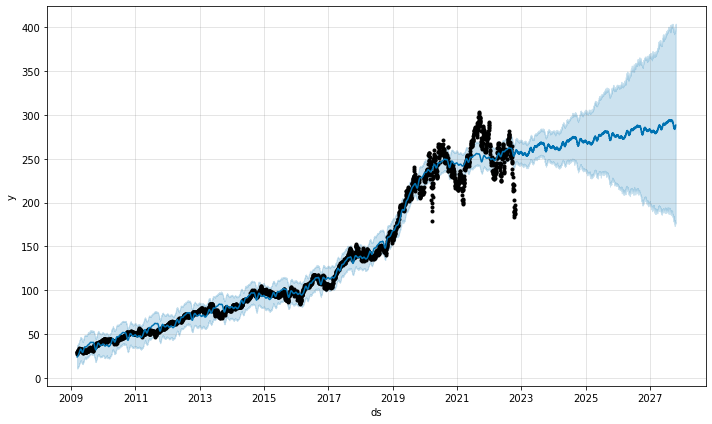

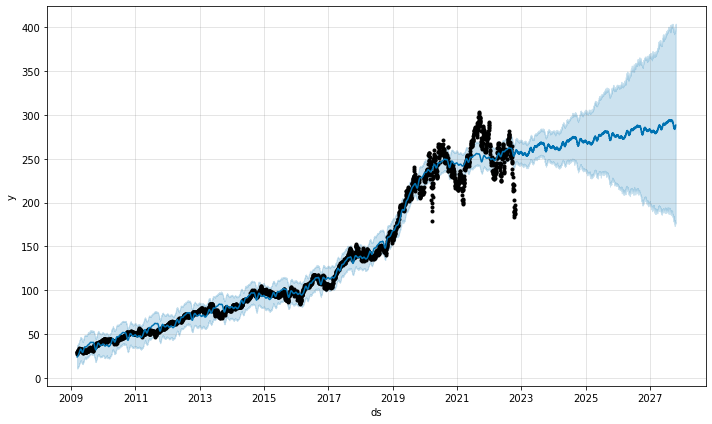

In [17]:
df.fb_forecast('AMT')